# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

/data/lfw/Dan_Ackroyd/Dan_Ackroyd_0001.jpg
Number of faces detected: 1


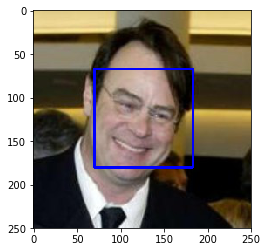

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')
print(human_files[0])
# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
Human: 98%, Dog: 17%

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

num_human_face = sum([face_detector(img) for img in human_files_short])
num_dog_face = sum([face_detector(img) for img in dog_files_short])

print('human face detected: ', num_human_face, '%')
print('dog face detected: ', num_dog_face, '%')

human face detected:  98 %
dog face detected:  17 %


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [17]:
### (Optional) 

# extract pre-trained face detector

lbp_cascade = cv2.CascadeClassifier('lbpcascades/lbpcascade_frontalface.xml')
def lbp_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = lbp_cascade.detectMultiScale(gray)
    return len(faces) > 0

lbp_human_face = sum([lbp_detector(img) for img in human_files_short])
lbp_dog_face = sum([lbp_detector(img) for img in dog_files_short])

print('human face detected: ', lbp_human_face, '%')
print('dog face detected: ', lbp_dog_face, '%')

human face detected:  95 %
dog face detected:  28 %


---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [81]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [5]:
from PIL import Image
import torchvision.transforms as transforms

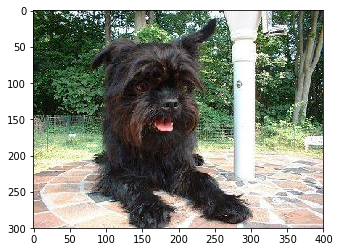

In [6]:
# Show an example
dog_image = Image.open('/data/dog_images/train/001.Affenpinscher/Affenpinscher_00001.jpg').convert('RGB')
plt.imshow(dog_image)
plt.show()

In [7]:
# Resize image to 244*244 for VGG
# VGG-16 Takes 224x224 images as input, so we resize all of them

def img_to_tensor(img_path):
    img = Image.open(img_path).convert('RGB')
    transformation = transforms.Compose([transforms.Resize(224),
                                         transforms.CenterCrop(224),
                                         transforms.ToTensor()])
    tensor = transformation(img)
    return tensor

def tensor_to_img(tensor):
    img = transforms.ToPILImage()(tensor).convert('RGB')
    return img

torch.Size([3, 224, 224])


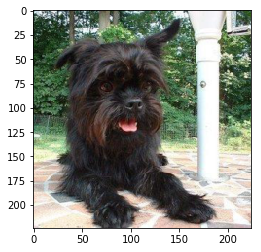

In [8]:
# Test transformation function

# test the shape of tranformed image
dog_tensor = img_to_tensor('/data/dog_images/train/001.Affenpinscher/Affenpinscher_00001.jpg')
print(dog_tensor.shape)

# Plot transformed image
plt.imshow(tensor_to_img(dog_tensor))
plt.show() 

In [86]:
def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''

    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    # Need to add another dimension for passing through VGG
    image_tensor = img_to_tensor(img_path).unsqueeze(0)
   
    # GPU mode
    if use_cuda:
        image_tensor = image_tensor.cuda()
    
    # Go through the VGG
    output = VGG16(image_tensor)
    
    # Make prediction
    value, prediction = torch.max(output, 1)
    
    # Extract prediction from tensor
    if use_cuda:
        prediction = np.squeeze(prediction.cpu().numpy())
    else:
        prediction = np.squeeze(prediction.numpy())
 
    return prediction

In [87]:
# Test VGG16_predict
prediction = VGG16_predict('/data/dog_images/train/001.Affenpinscher/Affenpinscher_00001.jpg')
print(prediction)

252


### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [22]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    prediction = VGG16_predict(img_path)
    return ((151 <= prediction ) & (prediction <=268))

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ Human: 0%, Dog: 93%


In [14]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

vgg_human_face = sum([dog_detector(img) for img in human_files_short])
vgg_dog_face = sum([dog_detector(img) for img in dog_files_short])

print('human face detected: ', vgg_human_face, '%')
print('dog face detected: ', vgg_dog_face, '%')

human face detected:  0 %
dog face detected:  93 %


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [15]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [10]:
import os
import numpy as np
import torch
from PIL import Image, ImageFile 
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
%matplotlib inline

ImageFile.LOAD_TRUNCATED_IMAGES = True

# check if CUDA is available
use_cuda = torch.cuda.is_available()

In [38]:
!pip install Pillow

In [12]:
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# number of subprocesses to use for data loading
num_workers = 1
# how many samples per batch to load
batch_size = 8

# path for data sets
train_path = '/data/dog_images/train'
test_path = '/data/dog_images/test'
valid_path = '/data/dog_images/valid'

# transformation pipeline
transformation = transforms.Compose([transforms.Resize(224),
                                     transforms.CenterCrop(224),
                                     transforms.RandomHorizontalFlip(),
                                     transforms.RandomRotation(15),
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.5, 0.5, 0.5), (0.25, 0.25, 0.25))])

# set data sets
train_data = datasets.ImageFolder(train_path, transform=transformation)
test_data = datasets.ImageFolder(test_path, transform=transformation)
valid_data = datasets.ImageFolder(valid_path, transform=transformation)

# set data loaders
loaders_scratch = dict()
loaders_scratch['train'] = DataLoader(train_data, batch_size=batch_size,
                                      shuffle=True,
                                      num_workers=num_workers)
loaders_scratch['test']  = DataLoader( test_data, batch_size=batch_size,
                                      shuffle=True,
                                      num_workers=num_workers)
loaders_scratch['valid'] = DataLoader(valid_data, batch_size=batch_size,
                                      shuffle=True,
                                      num_workers=num_workers)

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: 
- I used resizeing and center cropping to resize my images. I chose my input tensor to be (8, 3, 224, 224), as 8 to be the batch size, 3 to be the RGB channel, (224, 224) is the image size in order to fit the ResNet in the later section.
- To augment the dataset, I used random horizontal flip and random roation. The purpose is to generalize the data to avoid overfitting.
- I also do normalizing so that the input numbers will not be too divided.

(8, 3, 224, 224)


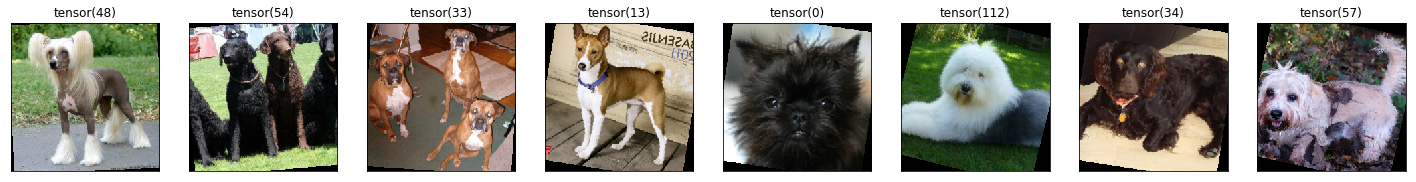

In [15]:
# Testing: visualize a batch of images in training set

# obtain one batch of training images
train_iter = iter(loaders_scratch['train'])
images, labels = train_iter.next()
images = images.numpy() # convert images to numpy for display
print(images.shape)
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 16 images
for idx in np.arange(8):
    ax = fig.add_subplot(1, 8, idx+1, xticks=[], yticks=[])
    images[idx] = images[idx] * 0.25 + 0.5
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))  # convert from Tensor image
    ax.set_title(labels[idx])

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [6]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()       
        
        ## Define layers of a CNN
        # convolutional layer
        self.conv1 = nn.Conv2d(3, 16, 3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(64, 128, 3, stride=1, padding=1)
        self.conv5 = nn.Conv2d(128, 256, 3, stride=1, padding=1)
        
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        
        # linear layer 
        self.fc1 = nn.Linear(256*7*7, 4096)  # 256*7*7=12544 -> 2^12
        self.fc2 = nn.Linear(4096, 1024)     # 2^12 -> 2^10
        self.fc3 = nn.Linear(1024, 133)      # 2^10 -> 133 classes
        
        # dropout layer
        self.dropout = nn.Dropout(0.5)
        
        # batch normalization
        self.batch_normal1 = nn.BatchNorm1d(num_features=4096)
        self.batch_normal2 = nn.BatchNorm1d(num_features=1024)
        
    def forward(self, x):
        ## Define forward behavior
        
        # 3*224*224 -> 16*224*224 -> 16*112*112
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        
        # 16*112*112 -> 32*112*112 -> 32*56*56
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        
        # 32*56*56 -> 64*56*56 -> 64*28*28
        x = F.relu(self.conv3(x))
        x = self.pool(x)

        # 64*28*28 -> 128*28*28 -> 128*14*14
        x = F.relu(self.conv4(x))
        x = self.pool(x)
        
        # 128*14*14 -> 256*14*14 -> 256*7*7
        x = F.relu(self.conv5(x))
        x = self.pool(x)  
        
        # Flatten
        x = x.view(x.size(0), -1)
        
        # 12544 -> 4096
        x = self.dropout(x)
        x = F.relu(self.batch_normal1(self.fc1(x)))
        
        # 4096 -> 1024
        x = self.dropout(x)
        x = F.relu(self.batch_normal2(self.fc2(x)))

        # 1024 -> 133
        x = self.dropout(x)
        x = self.fc3(x) 
        
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer__:
- The size of input images are (224, 224). I want to extract the features and downsize the tensors so that I could feed them into dense layers. 
- I first used five convolutional layers. The first Conv layer used 16 filters, than 32, 64, 128 and 256 filters. To keep the size of tensors unchanged, I set stride to be 1 pixel and padding to be 1 pixel. 
- For every Conv layer, there is a max pooling layers after it. The pooling layers take a 2-by-2 filter in order to half-sized the image after every Conv-Maxpool layer combination. After the process, the tensor size should be 256-by-7-by-7, which has 12544 pixels total.
- The last step is to feed the flatted tensors into a series of dense layers. I used three Linear layers to decrease the size of the input tensor from 12544 to 133, which is the same as the number of dog classes.
- For first two Linear layer, a batch normalization and a relu activation function is processed. Dropout layers are also used to avoid overfitting.


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [25]:
import torch.optim as optim

# specify loss function
criterion_scratch = nn.CrossEntropyLoss()

# specify optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.02)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [27]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path, valid_loss_min=np.Inf):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    
    # we can use already-trained model for further training
    if os.path.exists(save_path):
        model.load_state_dict(torch.load(save_path))
    else:
        valid_loss_min = np.Inf 
        
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
                
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()*data.size(0)
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
                
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss += loss.item()*data.size(0)
        
        # calculate average losses
        train_loss = train_loss/len(loaders['train'].dataset)
        valid_loss = valid_loss/len(loaders['valid'].dataset)
        
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(epoch, 
                                                                                   train_loss,
                                                                                   valid_loss))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,
                                                                                            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
    # return trained model
    return model

In [29]:
# train the model (have already been trained for 30 epochs)
model_scratch = train(5, 
                      loaders_scratch, 
                      model_scratch, 
                      optimizer_scratch, 
                      criterion_scratch, 
                      use_cuda, 
                      'model_scratch.pt', 
                      valid_loss_min=2.70)

Epoch: 1 	Training Loss: 2.568857 	Validation Loss: 2.679040
Validation loss decreased (2.700000 --> 2.679040).  Saving model ...
Epoch: 2 	Training Loss: 2.496925 	Validation Loss: 2.822409
Epoch: 3 	Training Loss: 2.434145 	Validation Loss: 2.736663
Epoch: 4 	Training Loss: 2.388977 	Validation Loss: 2.668539
Validation loss decreased (2.679040 --> 2.668539).  Saving model ...
Epoch: 5 	Training Loss: 2.315498 	Validation Loss: 2.615806
Validation loss decreased (2.668539 --> 2.615806).  Saving model ...


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [28]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [29]:
# load the model that got the best validation accuracy
model_scratch = Net()
if use_cuda:
    model_scratch.cuda()
model_scratch.load_state_dict(torch.load('model_scratch.pt'))
# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 2.539133


Test Accuracy: 32% (272/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [34]:
## TODO: Specify data loaders
loaders_transfer = loaders_scratch

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [35]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.resnet18(pretrained=True)
    
# view the structure of the model
model_transfer

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.torch/models/resnet18-5c106cde.pth
100%|██████████| 46827520/46827520 [00:00<00:00, 77237801.26it/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [36]:
# Freeze training for all "features" layers
for param in model_transfer.parameters():
    param.requires_grad = False

# Change the last fc layer to fit our purpose
model_transfer.fc = nn.Linear(512, 133)

if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
- I used pretrained model in order to get better performence.
- I chose ResNet18. Since the final layer of ResNet18 is 512-to-1024 dense net, which is not fit to our model (133 outputs), I changed it to a 512-to-133 dense net.
- The ResNet18 is used to classify general images. Even though it's not for classifying dog breeds. I think it should have good performence when do transfer learning.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [37]:
import torch.optim as optim

criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.fc.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [11]:
# train the model
model_transfer = train(10, 
                       loaders_transfer, 
                       model_transfer, 
                       optimizer_transfer, 
                       criterion_transfer, 
                       use_cuda, 
                       'model_transfer.pt')

Epoch: 1 	Training Loss: 2.619976 	Validation Loss: 1.170298
Validation loss decreased (inf --> 1.170298).  Saving model ...
Epoch: 2 	Training Loss: 1.254766 	Validation Loss: 0.888186
Validation loss decreased (1.170298 --> 0.888186).  Saving model ...
Epoch: 3 	Training Loss: 1.000067 	Validation Loss: 0.801300
Validation loss decreased (0.888186 --> 0.801300).  Saving model ...
Epoch: 4 	Training Loss: 0.891306 	Validation Loss: 0.805479
Epoch: 5 	Training Loss: 0.788626 	Validation Loss: 0.756827
Validation loss decreased (0.801300 --> 0.756827).  Saving model ...
Epoch: 6 	Training Loss: 0.757821 	Validation Loss: 0.773181
Epoch: 7 	Training Loss: 0.721762 	Validation Loss: 0.756767
Validation loss decreased (0.756827 --> 0.756767).  Saving model ...
Epoch: 8 	Training Loss: 0.684328 	Validation Loss: 0.746139
Validation loss decreased (0.756767 --> 0.746139).  Saving model ...
Epoch: 9 	Training Loss: 0.675800 	Validation Loss: 0.758066
Epoch: 10 	Training Loss: 0.641086 	Valida

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [106]:
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer = models.resnet18()
model_transfer.fc = nn.Linear(512, 133)

if use_cuda:
    model_transfer = model_transfer.cuda()
    
model_transfer.load_state_dict(torch.load('model_transfer.pt'))
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.770739


Test Accuracy: 77% (647/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [107]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_data.classes]

def img_to_tensor(img_path):
    img = Image.open(img_path).convert('RGB')
    transformation = transforms.Compose([transforms.Resize(224),
                                         transforms.CenterCrop(224),
                                         transforms.ToTensor(),
                                         transforms.Normalize((0.5, 0.5, 0.5), (0.25, 0.25, 0.25))])
    tensor = transformation(img)[:3,:,:].unsqueeze(0)
    return tensor

def show_image(img_path):
    image = Image.open(img_path)
    plt.imshow(image)
    plt.show()

def predict_breed_transfer(img_path, model_transfer):
    # load the image and return the predicted breed
    image_tensor = img_to_tensor(img_path)

    # move model inputs to cuda, if GPU available
    if use_cuda:
        image_tensor = image_tensor.cuda()
        model_transfer = model_transfer.cuda()
        
    # get sample outputs
    output = model_transfer(image_tensor)
    
    # convert output probabilities to predicted class
    _, prediction = torch.max(output, 1)
    if use_cuda:
        prediction_index = np.squeeze(prediction.cpu().numpy()) 
    else:
        prediction_index = np.squeeze(prediction.numpy())
    
    return class_names[prediction_index]

Mastiff


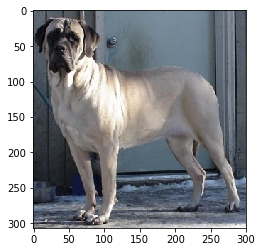

Boykin spaniel


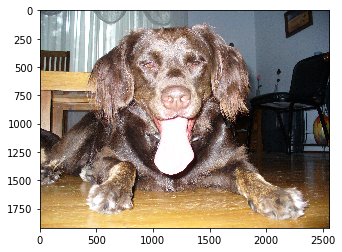

Italian greyhound


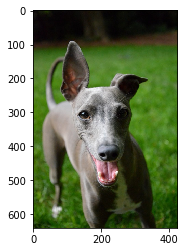

Irish setter


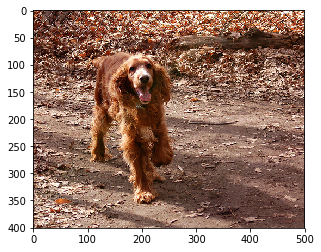

In [108]:
import random
from glob import glob

dog_files = np.array(glob("/data/dog_images/*/*/*"))
# Testing
for idx in list([1, 1251, 5233, 8180]):
    prediction = predict_breed_transfer(dog_files[idx], model_transfer)
    print(prediction)
    show_image(dog_files[idx])

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [15]:
import torchvision.models as models
import torch.nn as nn
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

human_model = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

dog_model = models.vgg16(pretrained=True)
for param in dog_model.parameters():
    param.requires_grad = False
if use_cuda:
    dog_model = dog_model.cuda()
    
model_transfer = models.resnet18()
model_transfer.fc = nn.Linear(512, 133)
if use_cuda:
    model_transfer = model_transfer.cuda()
model_transfer.load_state_dict(torch.load('model_transfer.pt'))
model_transfer.eval()

class_names = [item[4:].replace("_", " ") for item in train_data.classes]

def img_to_tensor(img_path):
    img = Image.open(img_path).convert('RGB')
    transformation = transforms.Compose([transforms.Resize(224),
                                         transforms.CenterCrop(224),
                                         transforms.ToTensor(),
                                         transforms.Normalize((0.5, 0.5, 0.5), (0.25, 0.25, 0.25))])
    tensor = transformation(img)[:3,:,:].unsqueeze(0)
    return tensor

def show_image(img_path):
    image = Image.open(img_path)
    plt.imshow(image)
    plt.show()

def predict_breed_transfer(img_path, model_transfer):
    # load the image and return the predicted breed
    image_tensor = img_to_tensor(img_path)

    # move model inputs to cuda, if GPU available
    if use_cuda:
        image_tensor = image_tensor.cuda()
        model_transfer = model_transfer.cuda()
        
    # get sample outputs
    output = model_transfer(image_tensor)
    
    # convert output probabilities to predicted class
    _, prediction = torch.max(output, 1)
    if use_cuda:
        prediction_index = np.squeeze(prediction.cpu().numpy()) 
    else:
        prediction_index = np.squeeze(prediction.numpy())
    
    return class_names[prediction_index]

def img_to_tensor_dog(img_path):
    img = Image.open(img_path).convert('RGB')
    transformation = transforms.Compose([transforms.Resize(224),
                                         transforms.CenterCrop(224),
                                         transforms.ToTensor()])
    tensor = transformation(img)
    return tensor

def human_detector(img_path, human_model):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = human_model.detectMultiScale(gray)
    return len(faces) > 0

def dog_detector(img_path, dog_model):
    image_tensor = img_to_tensor_dog(img_path).unsqueeze(0)
    if use_cuda:
        image_tensor = image_tensor.cuda()
    output = dog_model(image_tensor)
    value, prediction = torch.max(output, 1)
    if use_cuda:
        prediction = np.squeeze(prediction.cpu().numpy())
    else:
        prediction = np.squeeze(prediction.numpy())
    return ((151 <= prediction ) & (prediction <=268))
    
def run_app(img_path, human_model, dog_model, dog_breed_model):
    prediction = predict_breed_transfer(img_path, dog_breed_model)
    show_image(img_path)
    
    if human_detector(img_path, human_model):
        print("This is a human but looks like", prediction)
    elif dog_detector(img_path, dog_model):
        print("This is a dog and looks like", prediction)
    else:
        print("We don't know what it is, but looks like", prediction)
        
    print("\n")

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)
- Do hyperparameter tuning
- Use different pretrained models, like ResNet50.
- Further augments the data set to make the model more generalized.

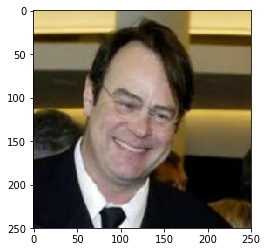

This is a human but looks like Xoloitzcuintli




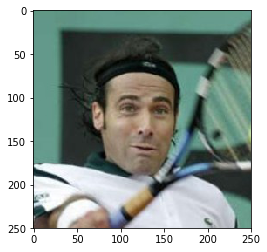

This is a human but looks like Norwich terrier




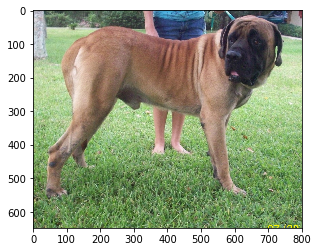

This is a dog and looks like Bullmastiff




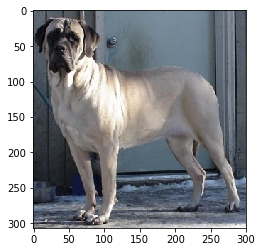

This is a dog and looks like Mastiff




In [16]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:2], dog_files[:2])):
    run_app(file, human_model, dog_model, model_transfer)

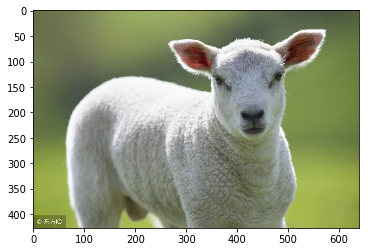

We don't know what it is, but looks like Xoloitzcuintli




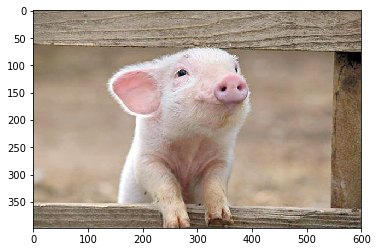

We don't know what it is, but looks like Bull terrier




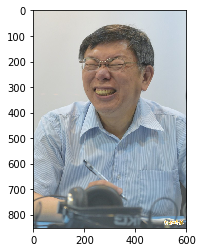

This is a human but looks like Norwich terrier




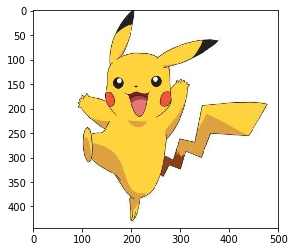

We don't know what it is, but looks like Dachshund




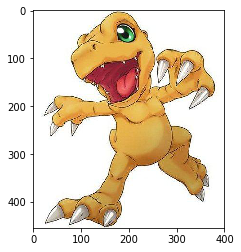

We don't know what it is, but looks like Dachshund




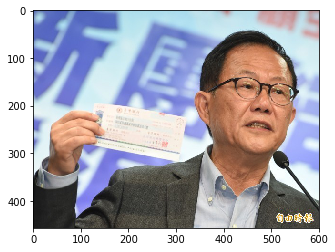

This is a human but looks like Lowchen




In [17]:
# Test on my own images
import numpy as np
from glob import glob

# load filenames for human and dog images
my_files = np.array(glob("/home/workspace/dog_project/my_image/*"))
for file in list(my_files):
    run_app(file, human_model, dog_model, model_transfer)